# IMPORTING DESIRED LIBRARIES

In [1]:
#Importing to be useful libraries at once
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
import warnings
warnings.simplefilter("ignore")
import os
%matplotlib inline

# IMPORTING ALL DATASETS

In [2]:
# Importing the given datasets
customers = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\ZEOTAP ASSIGNMENT\Customers (1).csv")
products = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\ZEOTAP ASSIGNMENT\Products (1).csv")
transactions = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\ZEOTAP ASSIGNMENT\Transactions.csv")

In [3]:
#merging customers and transactions
customers_transactions = pd.merge(customers, transactions, on='CustomerID', how='inner')

In [4]:
# merging preveously merged dataset with remaining dataset
full_data = pd.merge(customers_transactions, products, on='ProductID', how='inner')

In [5]:
# renaming all merged datasets as df for easier coding
df = full_data

# EXPLORATORY DATA ANALYSIS

In [6]:
df.head(10)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,57.3,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,57.3,SoundWave Cookbook,Books,57.3
5,C0073,Heidi Johnson,Europe,2022-08-20,T00634,P054,2024-03-20 02:37:13,4,229.2,57.3,SoundWave Cookbook,Books,57.3
6,C0083,Christina Stark,South America,2022-04-07,T00581,P054,2024-11-13 04:56:27,2,114.6,57.3,SoundWave Cookbook,Books,57.3
7,C0086,Stephanie Peterson,Europe,2022-09-18,T00873,P054,2024-08-02 11:13:00,4,229.2,57.3,SoundWave Cookbook,Books,57.3
8,C0124,Lindsay Perez,Europe,2024-08-26,T00203,P054,2024-03-31 16:50:02,4,229.2,57.3,SoundWave Cookbook,Books,57.3
9,C0143,Brian Parker,Asia,2024-05-27,T00262,P054,2024-01-30 22:40:57,1,57.3,57.3,SoundWave Cookbook,Books,57.3


In [7]:
df.tail(10)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
990,C0172,Jamie Webb,Europe,2024-09-09,T00816,P078,2024-09-25 06:56:25,2,82.36,41.18,HomeSense Rug,Home Decor,41.18
991,C0190,Alexander Lowe,South America,2024-05-31,T00515,P078,2024-12-14 00:46:19,1,41.18,41.18,HomeSense Rug,Home Decor,41.18
992,C0070,Timothy Perez,Europe,2022-03-15,T00825,P099,2024-02-08 14:20:05,1,354.29,354.29,SoundWave Mystery Book,Books,354.29
993,C0074,Jonathan Russo,Europe,2022-05-27,T00669,P099,2024-01-03 16:57:09,4,1417.16,354.29,SoundWave Mystery Book,Books,354.29
994,C0117,Jeffrey Mcmahon,North America,2024-11-22,T00147,P099,2024-08-05 20:03:50,4,1417.16,354.29,SoundWave Mystery Book,Books,354.29
995,C0125,Nicholas Taylor,North America,2022-12-18,T00266,P099,2024-02-27 18:25:58,2,708.58,354.29,SoundWave Mystery Book,Books,354.29
996,C0165,Juan Mcdaniel,South America,2022-04-09,T00672,P044,2024-07-28 00:09:49,4,75.28,18.82,ActiveWear Running Shoes,Clothing,18.82
997,C0165,Juan Mcdaniel,South America,2022-04-09,T00711,P044,2024-06-11 15:51:14,4,75.28,18.82,ActiveWear Running Shoes,Clothing,18.82
998,C0165,Juan Mcdaniel,South America,2022-04-09,T00878,P044,2024-09-24 21:15:21,3,56.46,18.82,ActiveWear Running Shoes,Clothing,18.82
999,C0169,Jennifer Shaw,South America,2023-04-13,T00157,P044,2024-11-09 09:07:36,2,37.64,18.82,ActiveWear Running Shoes,Clothing,18.82


In [8]:
df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x',
       'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [9]:
# removing any non_word symbols from column names
customers.columns = customers.columns.str.lower().str.replace(' ', '_')
products.columns = products.columns.str.lower().str.replace(' ', '_')
transactions.columns = transactions.columns.str.lower().str.replace(' ', '_')

In [10]:
# dropping duplicated column Price_y
df = df.drop(columns=['Price_y'])

In [11]:
# renaming column Price to Price_x
df = df.rename(columns={'Price_x': 'Price'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price            1000 non-null   float64
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 101.6+ KB


In [13]:
df.isnull().sum()

CustomerID         0
CustomerName       0
Region             0
SignupDate         0
TransactionID      0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
ProductName        0
Category           0
dtype: int64

In [14]:
# Converting dates to datetime format
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [15]:
# coverting data types
df['Price'] = df['Price'].astype(int)
df['Quantity'] = df['Quantity'].astype(float)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(1000, 12)

In [18]:
df.head(10)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.6,57,SoundWave Cookbook,Books
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3.0,171.9,57,SoundWave Cookbook,Books
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3.0,171.9,57,SoundWave Cookbook,Books
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3.0,171.9,57,SoundWave Cookbook,Books
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3.0,171.9,57,SoundWave Cookbook,Books
5,C0073,Heidi Johnson,Europe,2022-08-20,T00634,P054,2024-03-20 02:37:13,4.0,229.2,57,SoundWave Cookbook,Books
6,C0083,Christina Stark,South America,2022-04-07,T00581,P054,2024-11-13 04:56:27,2.0,114.6,57,SoundWave Cookbook,Books
7,C0086,Stephanie Peterson,Europe,2022-09-18,T00873,P054,2024-08-02 11:13:00,4.0,229.2,57,SoundWave Cookbook,Books
8,C0124,Lindsay Perez,Europe,2024-08-26,T00203,P054,2024-03-31 16:50:02,4.0,229.2,57,SoundWave Cookbook,Books
9,C0143,Brian Parker,Asia,2024-05-27,T00262,P054,2024-01-30 22:40:57,1.0,57.3,57,SoundWave Cookbook,Books


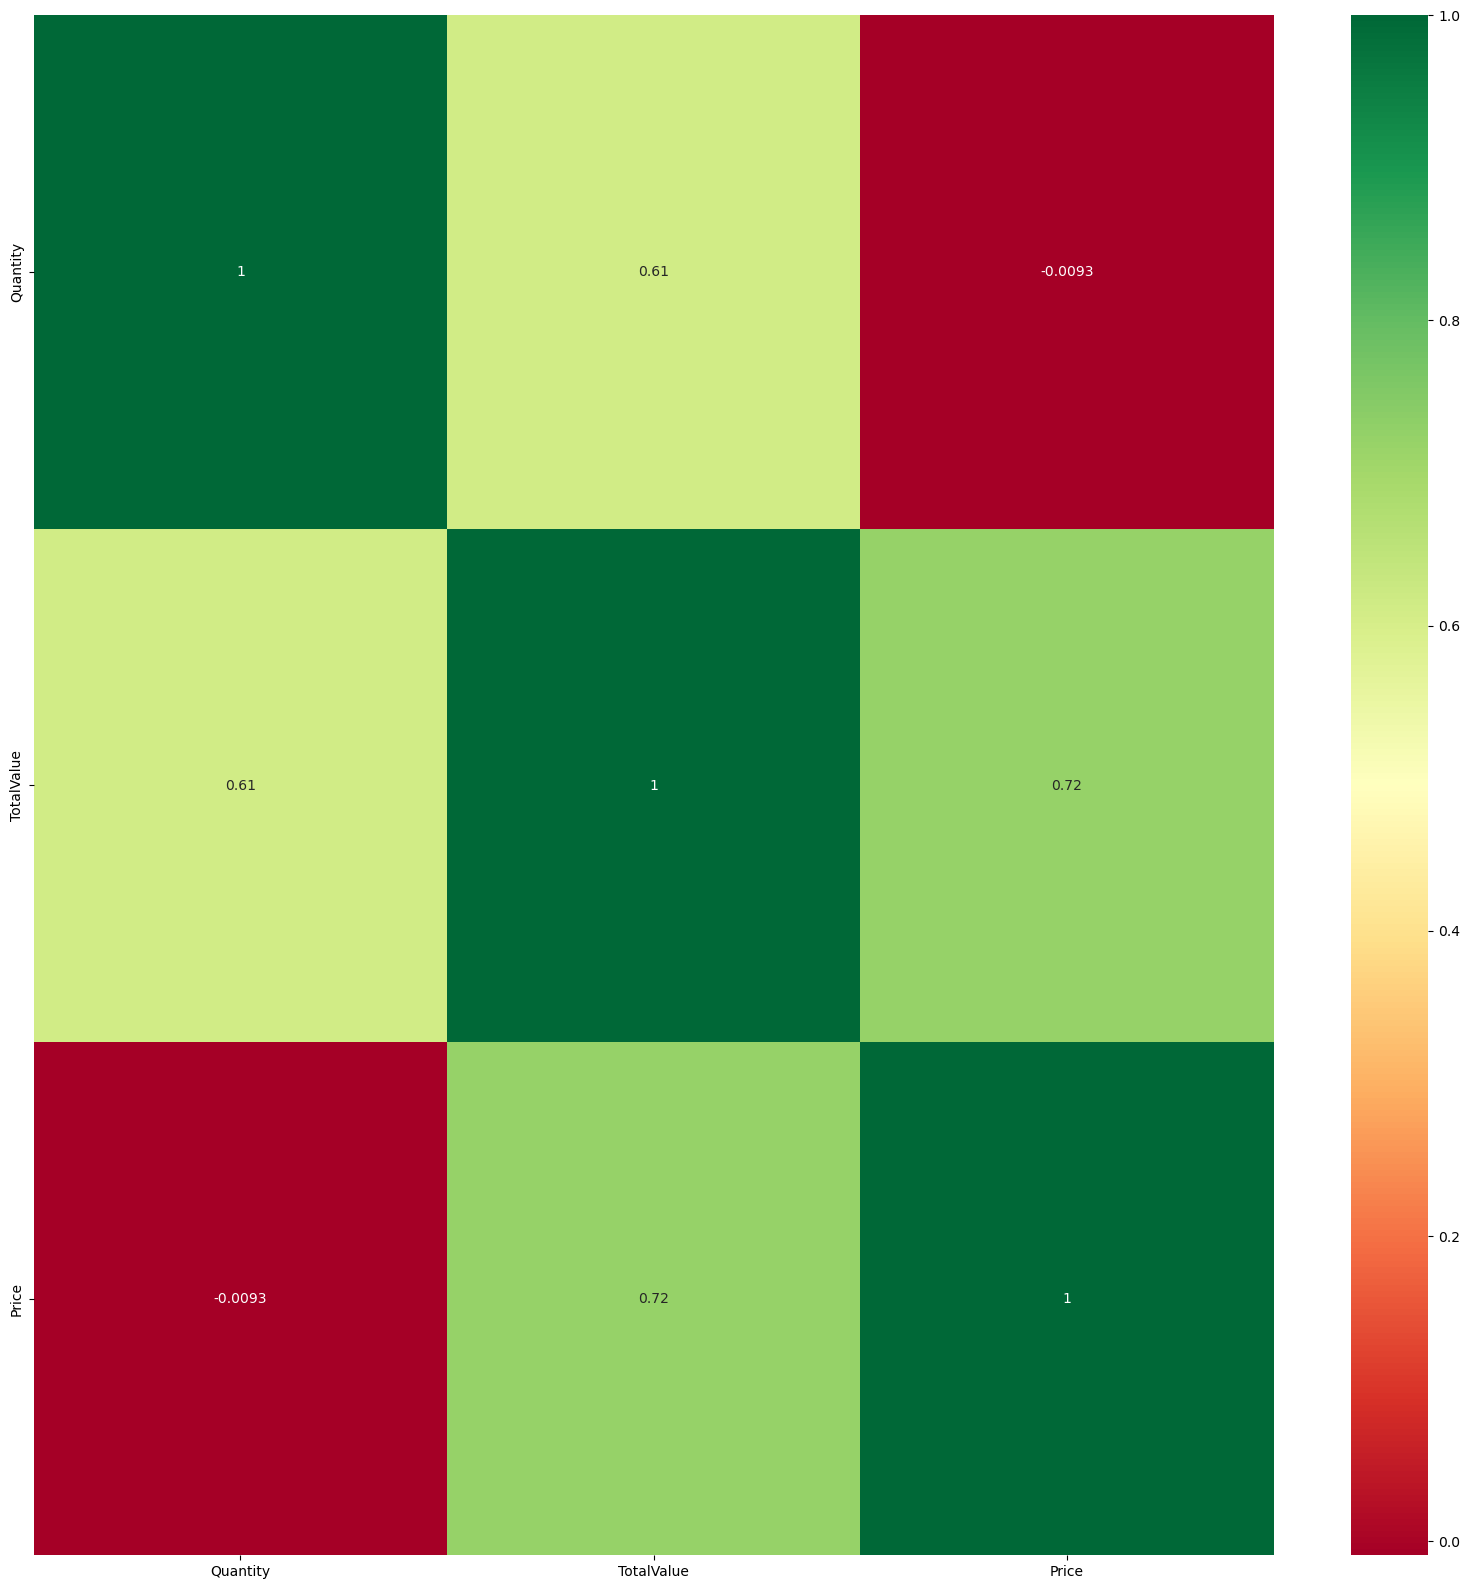

In [19]:
# getting correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plotting heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'SignupDate'}>,
        <AxesSubplot:title={'center':'TransactionDate'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'TotalValue'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

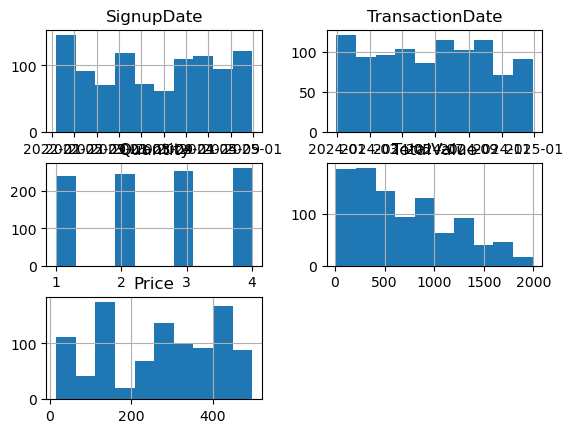

In [20]:
df.hist()

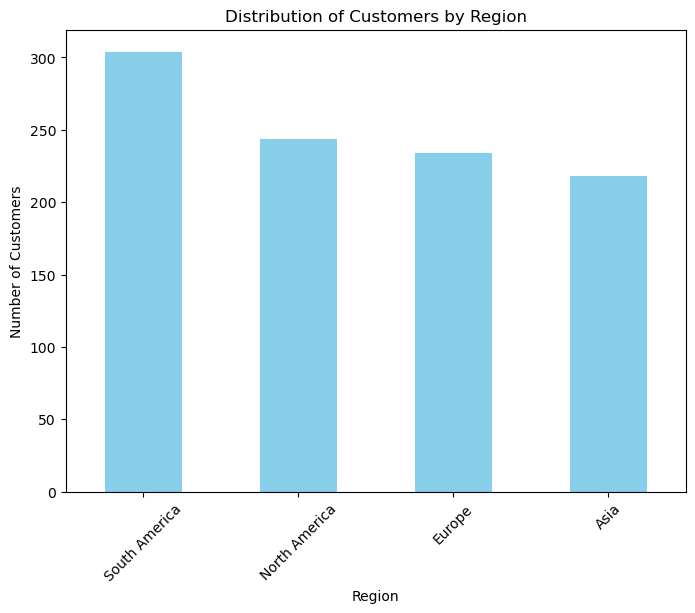

In [21]:
# Count of customers by region
region_distribution = df['Region'].value_counts()

# Plotting distribution
plt.figure(figsize=(8, 6))
region_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

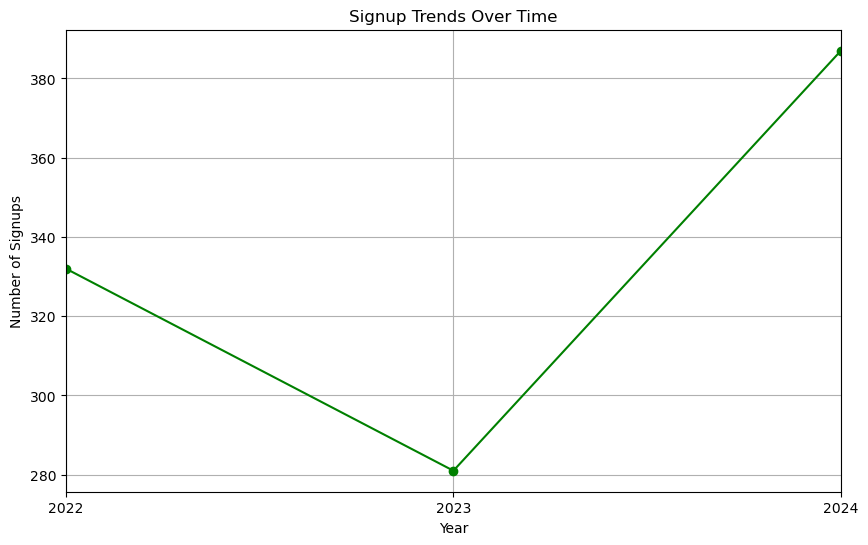

In [22]:
# Group by year and count signups
signup_trends = df['SignupDate'].dt.to_period('Y').value_counts().sort_index()

# Plotting signup trends
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

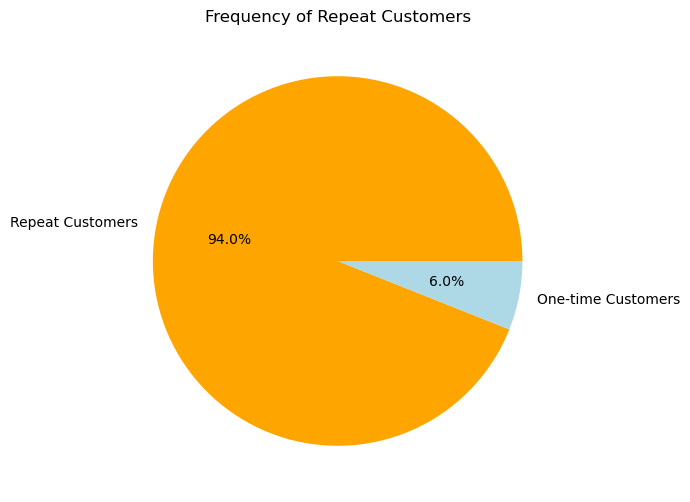

In [23]:
# Counting transactions per customer
repeat_customers = df['CustomerID'].value_counts()

# Separating repeat and one-time customers
repeat = repeat_customers[repeat_customers > 1].count()
one_time = repeat_customers[repeat_customers == 1].count()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie([repeat, one_time], labels=['Repeat Customers', 'One-time Customers'], autopct='%1.1f%%', colors=['orange', 'lightblue'])
plt.title('Frequency of Repeat Customers')
plt.show()


In [24]:
transactions_by_category = full_data.groupby('Category')['TransactionID'].count().reset_index()

In [25]:
transactions_by_category.columns = ['Category', 'TransactionCount']

In [26]:
transactions_by_category = transactions_by_category.sort_values(by='TransactionCount', ascending=False)

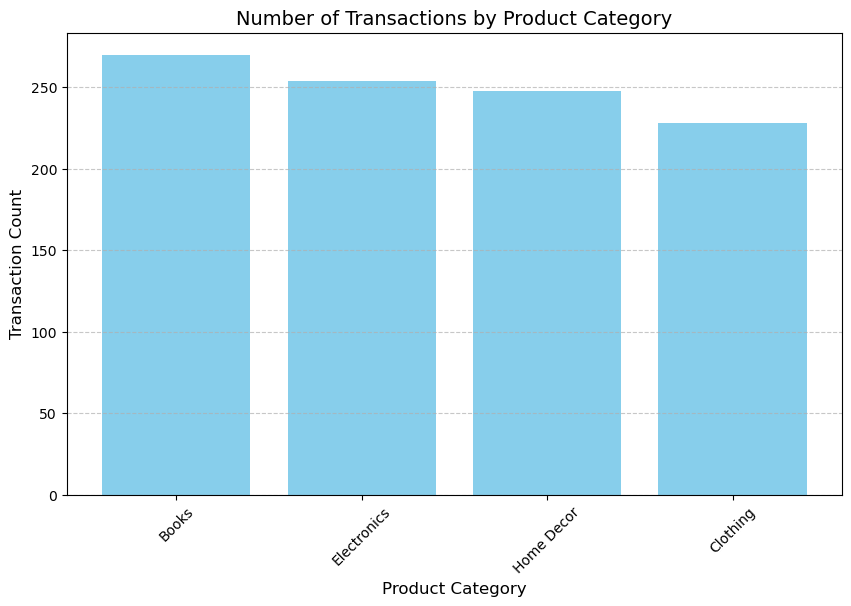

In [27]:
# Number of Transactions by Product Category 

plt.figure(figsize=(10, 6))
plt.bar(transactions_by_category['Category'], transactions_by_category['TransactionCount'], color='skyblue')
plt.title('Number of Transactions by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

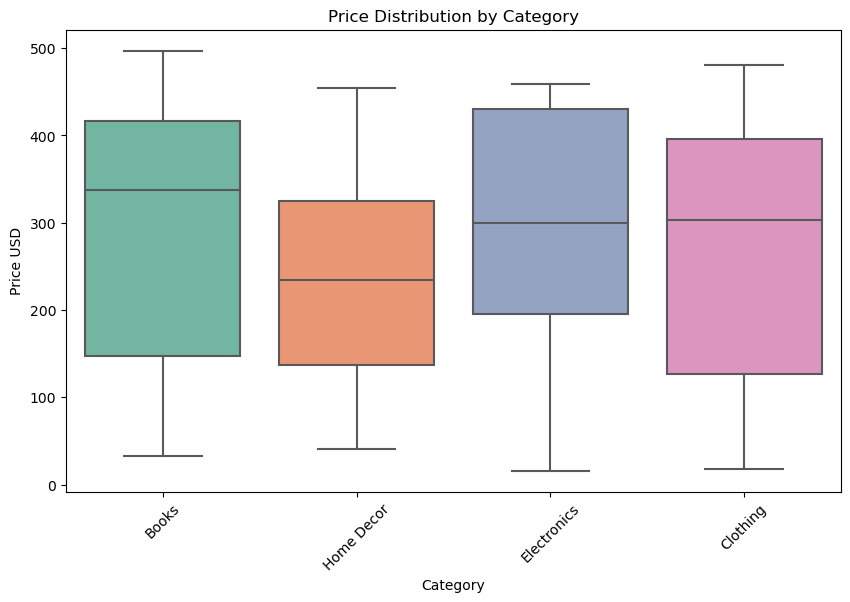

Category
Books          280.051852
Clothing       282.732456
Electronics    288.173228
Home Decor     237.072581
Name: Price, dtype: float64


In [28]:
# Boxplot for price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price USD')
plt.xticks(rotation=45)
plt.show()

# Average price per category
average_price = df.groupby('Category')['Price'].mean()
print(average_price)


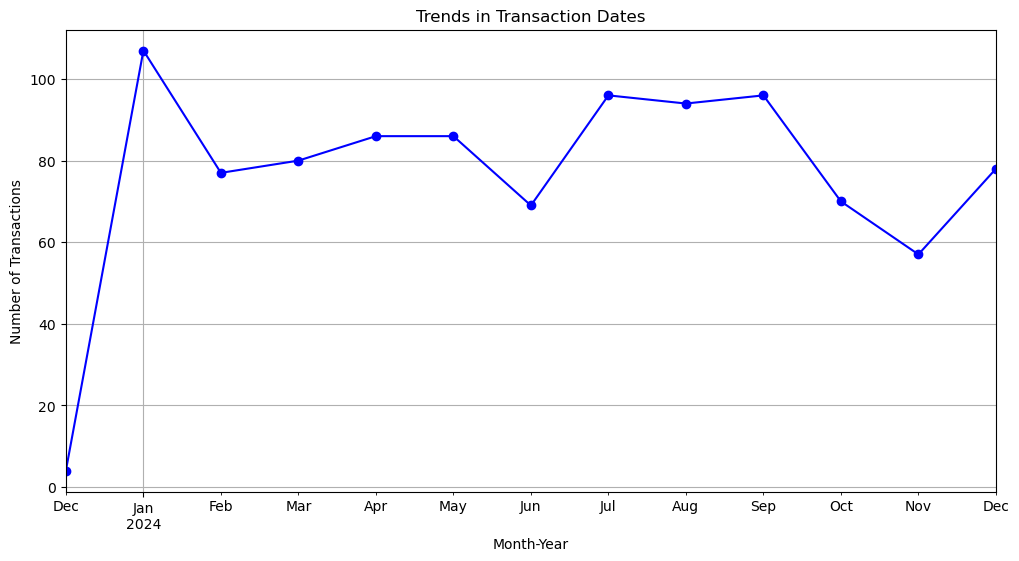

In [29]:
# Group by month-year and count transactions
transaction_trends = df['TransactionDate'].dt.to_period('M').value_counts().sort_index()

# Plotting transaction trends
plt.figure(figsize=(12, 6))
transaction_trends.plot(kind='line', marker='o', color='blue')
plt.title('Trends in Transaction Dates')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()


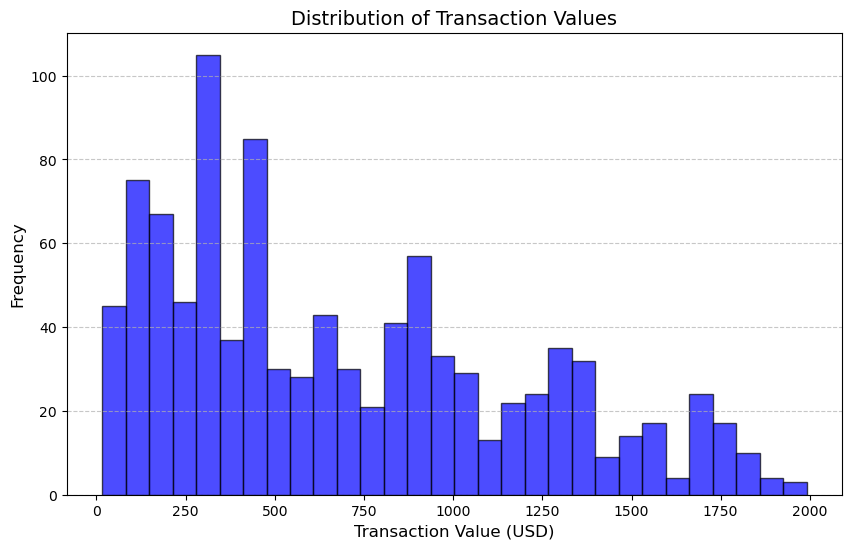

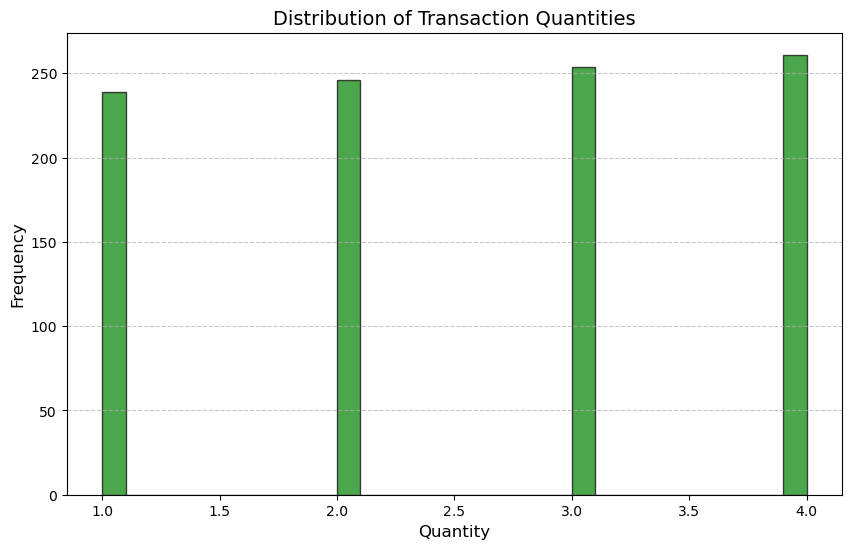

In [30]:
# Histogram for transaction values
plt.figure(figsize=(10, 6))
plt.hist(full_data['TotalValue'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Values', fontsize=14)
plt.xlabel('Transaction Value (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram for transaction quantities
plt.figure(figsize=(10, 6))
plt.hist(full_data['Quantity'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Quantities', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

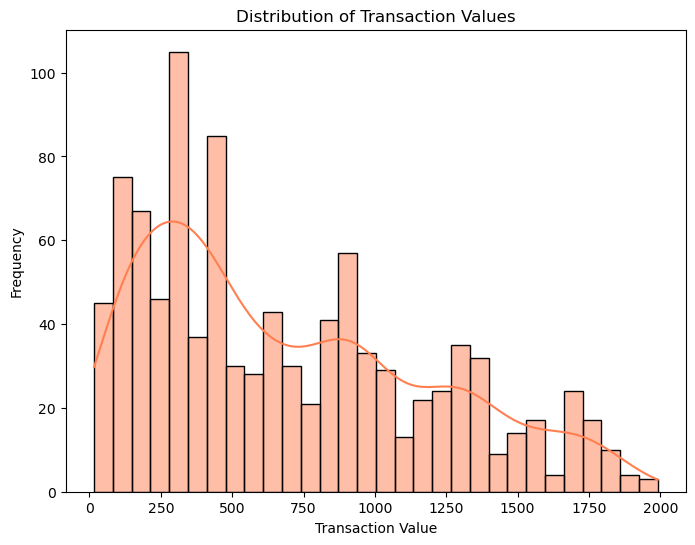

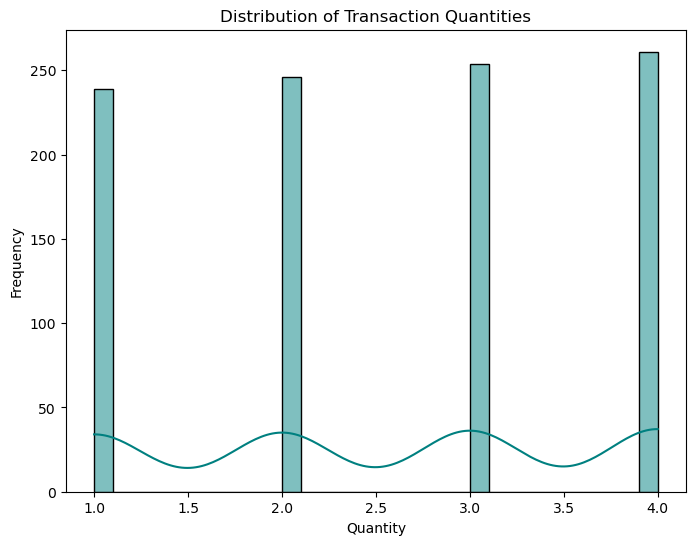

In [31]:
# Histogram for transaction values
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalValue'], bins=30, kde=True, color='coral')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Histogram for transaction quantities
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], bins=30, kde=True, color='teal')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


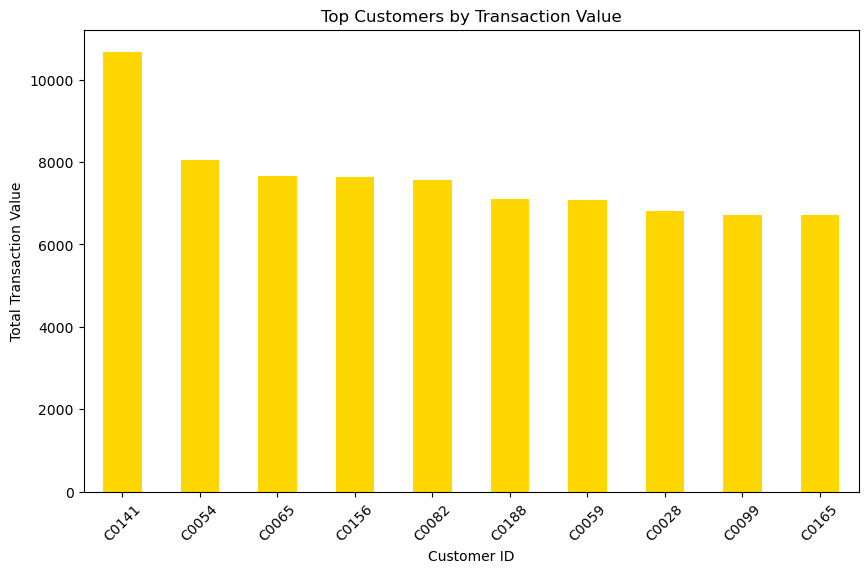

In [32]:
# Top customers by total transaction value
top_customers = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plotting top customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='gold')
plt.title('Top Customers by Transaction Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.show()
